In [ ]:
확률분포를 알면 어떤 가정을 하고 있는지 알 수 있다.

### 회귀분석용 가상 데이터 생성 방법
Scikit-learn의 datasets 서브 패키지는 회귀분석용 가상 데이터를 생성하는 명령어인 `make_regression()`를 제공한다. `make_regression()` 명령으로 만들어진 데이터는 종속 변수  $y$ 의 값이 독립 변수 $x$ 벡터의 선형 조합인 선형관계를 가진다. ($b4는 y절편 즉, 바이어스(bias) 값이다)

여기에 정규분포를 이루는 $ϵ$만큼의 **오차(disturbance)** 또는 **잡음(noise)**가 추가되는데 이 오차는 종속 변수 $y$에 영향을 미치는 요인 중에서 우리가 고려하지 않는 것들의 영향을 모두 합친 것이라고 생각하면 된다. 중심 극한 정리에 따라 이러한 모든 영향의 합은 정규 분포를 따를 가능성이 높기 때문에 **오차 $ϵ$는 보통 기댓값이 0인 정규 분포 확률 변수로 가정**한다(예측불가능).

- **$y = b + w^Tx + \epsilon$** : M개의 특성을 가지는 데이터 한 개일 경우의 식

cf) 분석한 결과와 실제결과의 차이는 $e$, 잔차라고 한다.

위 식에서 $x$, $w$는 $M$차원 벡터($M$은 입력 차원), $y$, $b$, $ϵ$ 는 모두 스칼라 값이다.
복수의 데이터에 대해서는 다음처럼 쓸 수 있다.

- **$y = b\mathbf{1} + Xw + \epsilon$** : 데이터가 여러개(N)
 
이 경우에는 $y$는 $N$차원 벡터($N$은 데이터의 갯수), $X$는 $N×M$ 차원 행렬($M$은 입력 차원), $w$는 $M$차원 벡터, $ϵ$는 $N$차원 벡터, $b$는 스칼라, $1$는  N 차원 열벡터이다.

`make_regression()` 명령은 내부적으로 입력(독립 변수) 데이터인 `X`행렬, 오차 `ϵ`벡터, 계수 `w`벡터를 확률적으로 생성한 후, 위 관계식에 따라 출력(종속 변수) 데이터 `y`벡터를 계산하여 `X`, `y`값을 출력한다.

`X, y = make_regression(...)`

또는

`X, y, w = make_regression(..., coef=True, ...)`

입력 인수는 다음과 같다.

- `n_samples` : 정수 (옵션, 디폴트 100)
    - 표본 데이터의 갯수  N 
- `n_features` : 정수 (옵션, 디폴트 100)
    - 독립 변수(feature)의 수(차원)  M 
- `n_targets` : 정수 (옵션, 디폴트 1)
    - 종속 변수(target)의 수(차원)
- `bias` : 실수 (옵션, 디폴트 0.0)
    - y 절편
- `noise` : 실수 (옵션, 디폴트 0.0) - noise 가 0이면 X로 y가 모두 설명이 됨(직선)
    - 출력 즉, 종속 변수에 더해지는 오차  ϵ 의 표준 편차
- `coef` : 불리언 (옵션, 디폴트 False)
    - True 이면 선형 모형의 계수도 출력
- `random_state` : 정수 (옵션, 디폴트 None)
    - 난수 발생용 시드값

출력은 다음과 같다.

- `X` : [`n_samples`, `n_features`] 형상의 2차원 배열
    - 독립 변수의 표본 데이터 행렬  $X$ 
- `y` : [`n_samples`] 형상의 1차원 배열 또는 [`n_samples`, `n_targets`] 형상의 2차원 배열
    - 종속 변수의 표본 데이터 벡터  $y$ 
- `coef` : [`n_features`] 형상의 1차원 배열 또는 [`n_features`, `n_targets`] 형상의 2차원 배열 (옵션)
    - 선형 모형의 계수 벡터 $w$, 입력 인수 `coef`가 True 인 경우에만 출력됨

다음은 독립 변수가 1개, 종속 변수가 1개이며 `noise` 인수값이 0이므로 오차가 없고 `bias`가 0이라서 x, y 그래프가 0을 지나는 경우이다.

In [9]:
from sklearn.datasets import make_regression

X, y, w = make_regression(n_samples=10, n_features=1, bias=0, noise=0,
                          coef=True, random_state=0)

In [10]:
print(X, y, w, sep=", \n")

[[ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [ 0.95008842]
 [ 1.76405235]
 [ 0.4105985 ]
 [-0.97727788]
 [ 0.40015721]
 [-0.10321885]
 [-0.15135721]], 
[ 77.48913677 177.41712535 147.85924209  75.22087885 139.66444108
  32.50811146 -77.37353667  31.6814481   -8.17209494 -11.98332915], 
79.17250380826646


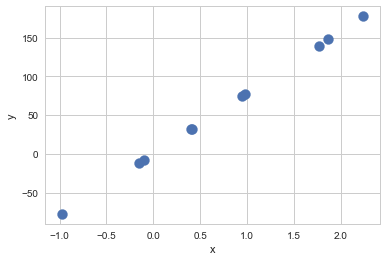

In [11]:
%matplotlib inline
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

위 코드를 실행하여 나온 선형 모형은 다음과 같다.
$$y = 79.1725 x$$

`noise` 인수를 증가시키면  $Var[ϵ]$ 가 증가하고 `bias` 인수를 증가시키면 $y$절편 $b$가 증가한다.

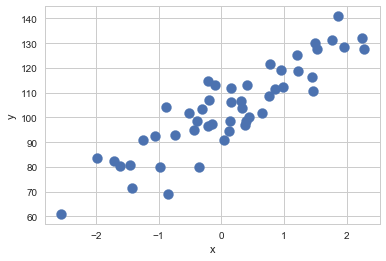

In [7]:
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10,
                          coef=True, random_state=0)
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##### 연습 문제 1
1. make_regression과 같은 기능을 하는 함수 make_regression2를 만들어라. 단 make_regression2는 coef=True 라고 가정한다. 즉 항상 가중치 계수를 반환한다. 또한 1차원 독립 변수만 생성할 수 있으므로 다음과 같은 인수만 가진다.
```
    n_samples
    bias
    noise
    random_state
```
2. make_regression2 함수에 coef 인수를 추가하여 make_regression3 함수를 만들어라. make_regression3 함수는 가중치를 스스로 생성하지 않고 coef 인수로 받은 가중치 계수 값을 그대로 사용하며 가중치 계수를 반환하지 않는다.

In [12]:
def make_regression2(n_samples, bias, noise, random_state):
    np.random.seed(random_state)
    X = np.random.randn(n_samples)
    b = bias
    ep = np.random.randn(n_samples)*noise/3
    w = np.random.randn(1)
    y = b + w*X + ep
    return X, y, b, w, ep

In [13]:
X, y, b, w, ep = make_regression2(n_samples=50, bias=3, noise=3, random_state=0)

In [14]:
X

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028])

In [15]:
y

array([ 5.42650984e+00,  4.14045882e+00,  4.33230598e+00,  6.03930741e+00,
        6.48871090e+00,  1.58797035e+00,  4.85567689e+00,  3.01744347e+00,
        2.17130125e+00,  3.41047769e+00,  2.59879530e+00,  5.37906301e+00,
        3.62000244e+00,  1.50284979e+00,  4.01328750e+00,  3.22657811e+00,
        4.18337770e+00,  3.07643833e+00,  2.68225530e+00,  1.44355441e+00,
       -1.07857399e+00,  4.35984522e+00,  5.76726431e+00,  3.67565604e-01,
        7.67663164e+00, -4.23599825e-01,  2.21537303e+00,  2.06865494e+00,
        5.57490171e+00,  5.82318933e+00,  2.12663951e+00,  4.61296350e+00,
        1.79382809e+00, -2.26638194e+00,  3.83308119e+00,  5.19031785e+00,
        6.49560232e+00,  5.08433761e+00,  1.19985261e+00,  3.48517009e+00,
        6.22239806e-01,  1.54833730e+00, -4.88892076e-03,  7.65024308e+00,
        2.39661454e+00,  2.88161324e+00,  6.51297565e-01,  6.25000200e+00,
        8.76992361e-02,  3.00136736e+00])

In [16]:
w, b

(array([1.8831507]), 3)

In [17]:
ep

array([-0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.0519454 ,
        0.72909056,  0.12898291,  1.13940068, -1.23482582,  0.40234164,
       -0.68481009, -0.87079715, -0.57884966, -0.31155253,  0.05616534,
       -1.16514984,  0.90082649,  0.46566244, -1.53624369,  1.48825219,
        1.89588918,  1.17877957, -0.17992484, -1.07075262,  1.05445173,
       -0.40317695,  1.22244507,  0.20827498,  0.97663904,  0.3563664 ,
        0.70657317,  0.01050002,  1.78587049,  0.12691209,  0.40198936])

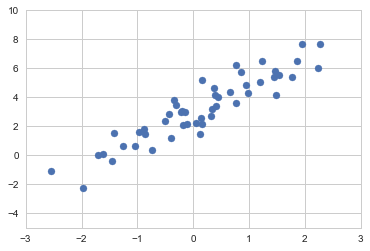

In [21]:
plt.xlim(-3, 3)
plt.ylim(-5, 10)
plt.scatter(X, y)

이번에는 `n_features` 즉, 독립 변수가 2개인 표본 데이터를 생성하여 스캐터 플롯을 그리면 다음과 같다. 종속 변수 값은 점의 명암으로 표시하였다.

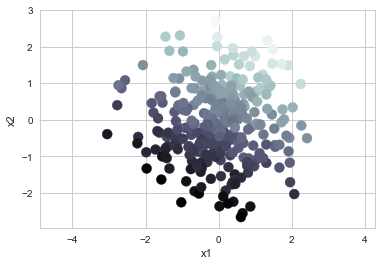

In [22]:
X, y, w = make_regression(n_samples=300, n_features=2, noise=10, 
                          coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

`make_regression` 명령은 위에서 설명한 인수 이외에도 다음과 같은 인수를 가질 수 있다.

- `n_informative` : 정수 (옵션, 디폴트 10) : X와 Y가 관계있는지
    - 독립 변수(feature) 중 실제로 종속 변수와 상관 관계가 있는 독립 변수의 수(차원)
- `effective_rank` : 정수 또는 None (옵션, 디폴트 None) : x들 간에 상관관계가 있는지
    - 독립 변수(feature) 중 서로 독립인 독립 변수의 수. 만약 None이면 모두 독립
- `tail_strength` : 0부터 1사이의 실수 (옵션, 디폴트 0.5)
    - `effective_rank`가 None이 아닌 경우 독립 변수간의 상관관계를 결정하는 변수. 0.5면 독립 변수간의 상관관계가 없다. 0, 1이면 상관관계가 전반적으로 늘어나거나 감소한다.(공분산이 $(n * n)/ 2$개가 발생하므로 너무 많아서 대표하는 값만 넣도록 하는것)

여러 개의 x변수 중 다른 x변수에 종속인 x변수가 들어가면 정확한 분석을 할 수 없다. $x_1 = x_2$이면, 해가 무한개 나오므로 한 개의 회귀식을 만들 수 없다. $x_1 \approx x_2$ 로 같은 값은 아니지만 상관관계가 강한 경우에는 회귀분석은 가능하지만 오차가 크게 나타난다. 이럴 경우 한 변수를 빼거나, PCA 같은 방법을 써서 한 변수를 변형시켜 자료에서 얻을 수 있는 잔유물을 남기고 변수를 버린다. 결론적으로 **회귀분석에서 독립변수는 서로 독립이어야 한다.**

예를 들어 2차원의 $x$데이터 중 실제로 $y$값에 영향을 미치는 독립 변수는 하나 뿐이라면 다음처럼 `n_informative=1`로 설정한다.

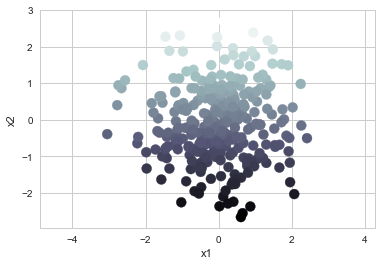

In [25]:
X, y, w = make_regression(n_samples=300, n_features=2, n_informative=1, 
                          noise=0, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

만약 두 독립 변수간의 상관관계를 증가시키고 싶다면 다음처럼 `tail_strength`를 0에 가까운 작은 값으로 설정한다.

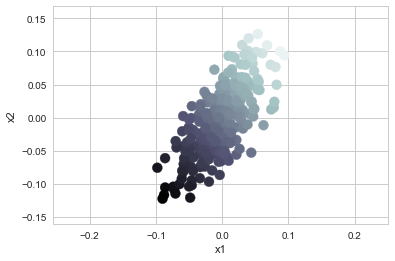

In [23]:
X, y, w = make_regression(n_samples=300, n_features=2, effective_rank=1, noise=0, 
                          tail_strength=0, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()